In [2]:
library(dplyr) #data wrangling
library(sp) #spatial data wrangling & analysis
library(rgdal) #spatial data wrangling
library(rgeos) #spatial data wrangling & analytics
library(tidyverse) # data wrangling
library(tmap) #modern data visualizations
library(data.table) #fread
library(ggplot2) #plotting


In [3]:
wnv_df <- fread("https://raw.githubusercontent.com/rsangole/capstone_project/master/data/processed/wnv.trap.date.rev3b.csv")
comarea606 <- readRDS( gzcon( url( description = "https://github.com/rsangole/capstone_project/blob/master/data/raw/chizip.RDS?raw=true" ) ) )

#required for mapping
comarea606_df <- fortify(comarea606, region="zip")

wnvpos_df <- wnv_df %>%
    filter(mos_any_wnv_present %in% "TRUE", part_train %in% "TRUE") 

load("nodes_trap_df.RData")
load("nodes_hosp_df.RData")

head(nodes_hosp_df,2)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

id,longitude,latitude,cftype,dist_to_trap
Cermak Hospital,-87.69757,41.84098,Hospital,9.5
Hartgrove Hospital,-87.76369,41.86881,Hospital,6.3


## create base map using the fortified file

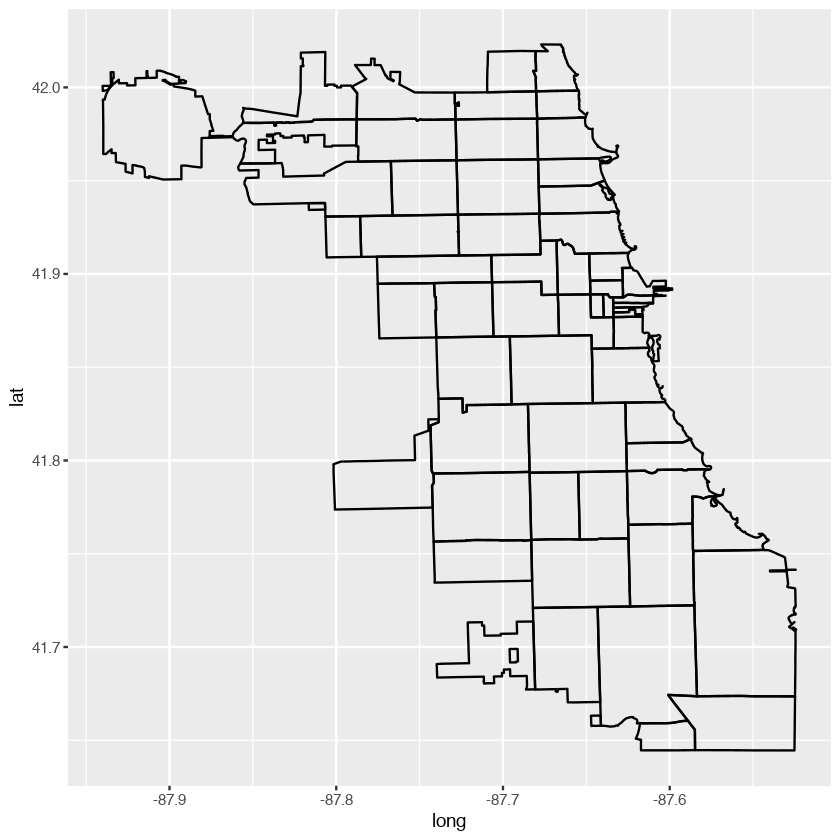

In [4]:
chicagoBaseMap <- ggplot() 
chicagoBaseMap <- chicagoBaseMap + geom_polygon(data=comarea606_df, aes(x=long, y=lat, group=group, fill="#528076"), color = "black", fill=NA, size=0.5)  
chicagoBaseMap

## Contour map of WNV with traps

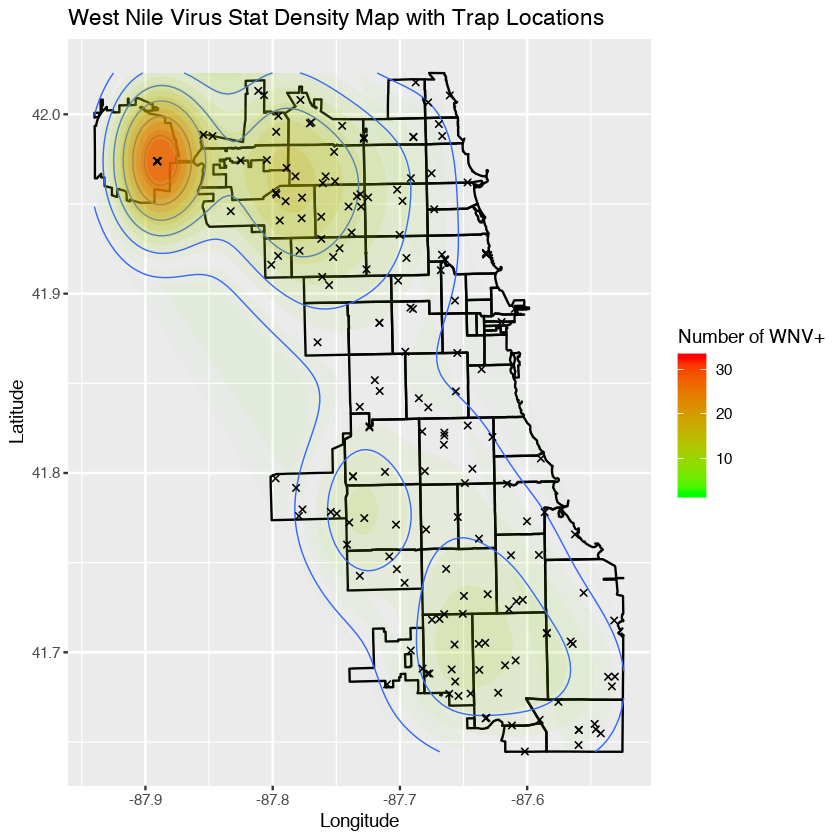

In [5]:
chicagoBaseMap + geom_density2d(data = wnvpos_df, aes(x = loc_lng, y = loc_lat), size = 0.3) + 
  stat_density2d(data = wnvpos_df, aes(x = loc_lng, y = loc_lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
  scale_fill_gradient(name="Number of WNV+", low = "green", high = "red") + 
  scale_alpha(range = c(0, 0.3), guide = FALSE) + 
  ggtitle("West Nile Virus Stat Density Map with Trap Locations") + 
  xlab("Longitude") + ylab("Latitude") +
  geom_point(data = nodes_trap_df, aes(x = longitude, y = latitude), shape = 4)

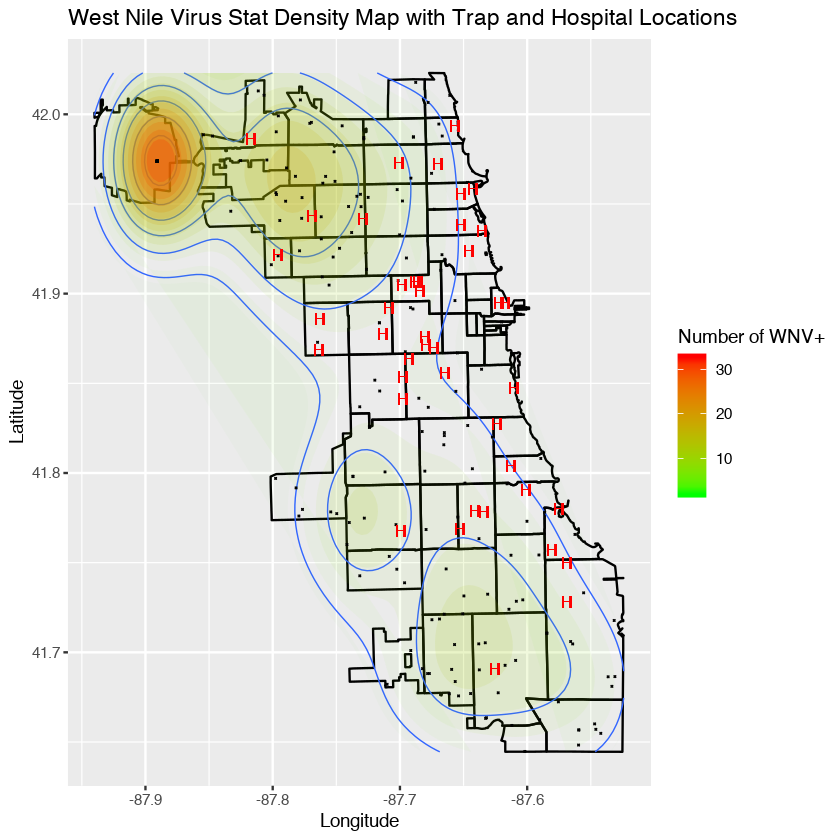

In [7]:
chicagoBaseMap + geom_density2d(data = wnvpos_df, aes(x = loc_lng, y = loc_lat), size = 0.3) + 
  stat_density2d(data = wnvpos_df, aes(x = loc_lng, y = loc_lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
  scale_fill_gradient(name="Number of WNV+", low = "green", high = "red") + 
  scale_alpha(range = c(0, 0.3), guide = FALSE) + 
  ggtitle("West Nile Virus Stat Density Map with Trap and Hospital Locations") + 
  xlab("Longitude") + ylab("Latitude") +
  geom_point(data = nodes_trap_df, aes(x = longitude, y = latitude), shape = 4, size=.1) + 
  geom_point(data = nodes_hosp_df, aes(x = longitude, y = latitude), shape = 72,size=3, colour="red") 

